In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
marcusan = pd.read_csv('marketing_customer_analysis.csv')

In [2]:
cols=[]
for c in marcusan.columns:
    cols.append(c.lower())
marcusan.columns=cols

marcusan = marcusan.drop(['unnamed: 0'], axis=1)
marcusan.head()

KeyError: "['unnamed: 0'] not found in axis"

In [3]:
marcusan.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [4]:
marcusan.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [5]:
numerical = marcusan.select_dtypes(include=np.number)
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
marcusan._get_numeric_data().isna().sum()

customer lifetime value          0
income                           0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
total claim amount               0
dtype: int64

In [7]:
mean_numer_of_open_complaints = np.mean(marcusan['months since last claim'])
marcusan['months since last claim'] = marcusan['months since last claim'].fillna(mean_numer_of_open_complaints)

In [8]:
mean_months_since_last_claim = np.mean(marcusan['number of open complaints'])
marcusan['number of open complaints'] = marcusan['number of open complaints'].fillna(mean_months_since_last_claim)

In [9]:
categorical = marcusan.select_dtypes(include=np.object)
categorical.head()

<ipython-input-9-2d4c1aa267db>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = marcusan.select_dtypes(include=np.object)


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()

In [11]:
y = marcusan['total claim amount']
X = marcusan[['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','number of open complaints','number of policies']]

model = lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

72.39096819184192
[-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]


In [12]:
print(lm.score(X,y))

0.5186628226558787


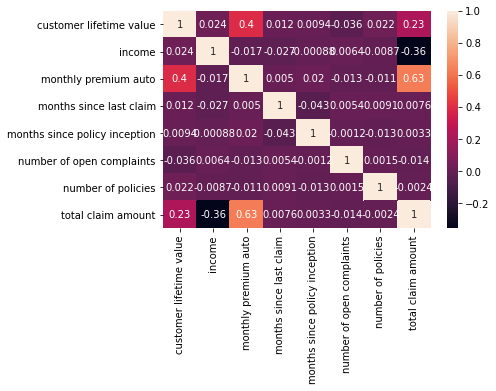

<Figure size 1296x936 with 0 Axes>

In [13]:
correlations_matrix = marcusan.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.figure(figsize=(18, 13))
plt.show()

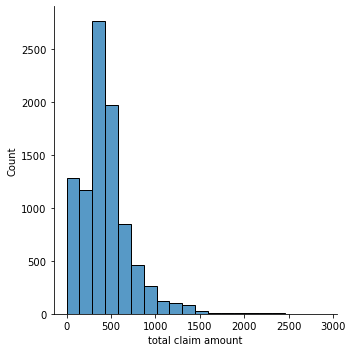

In [14]:
sns.displot(marcusan['total claim amount'], bins=20)
plt.show()

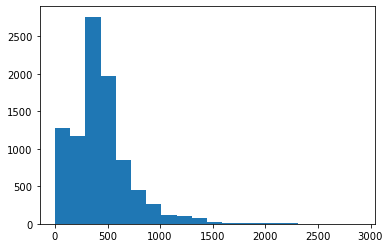

In [15]:
x = marcusan['total claim amount']
plt.hist(x, bins=20)
plt.show()

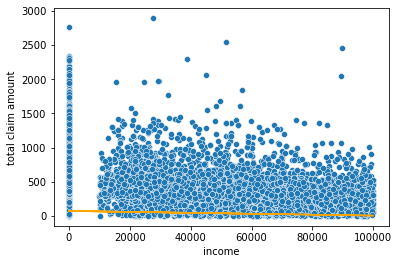

In [16]:
regression_line = lm.intercept_ + lm.coef_[0]*marcusan['income']
plt.plot(marcusan['income'], regression_line, c = 'orange')
sns.scatterplot(x='income',y='total claim amount',data=marcusan)
plt.show()

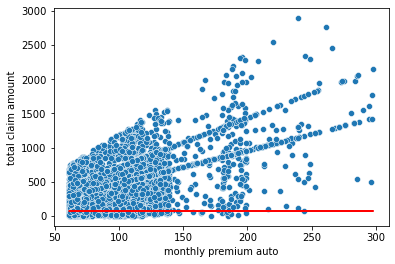

In [17]:
regression_line = lm.intercept_ + lm.coef_[0]*marcusan['monthly premium auto']
plt.plot(marcusan['monthly premium auto'], regression_line, c = 'red')
sns.scatterplot(x='monthly premium auto',y='total claim amount',data=marcusan)
plt.show()

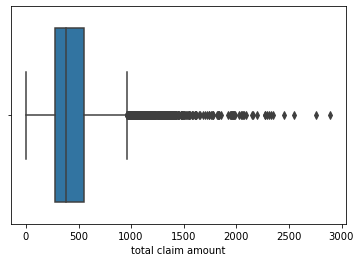

In [18]:
sns.boxplot(x=marcusan['total claim amount'])
plt.show()

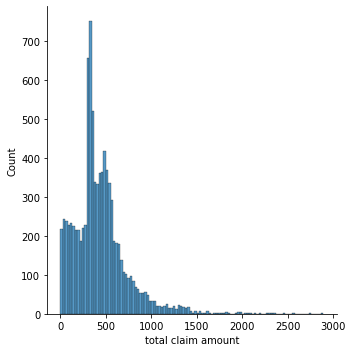

In [19]:
sns.displot(x=marcusan['total claim amount'])
plt.show()

In [20]:
iqr = np.percentile(marcusan['total claim amount'],75) - np.percentile(marcusan['total claim amount'],25)
upper_limit = np.percentile(marcusan['total claim amount'],75) + 1.5*iqr
lower_limit = np.percentile(marcusan['total claim amount'],25) - 1.5*iqr

In [21]:
lower_limit

-140.62664687499995

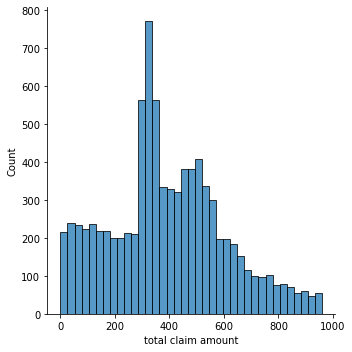

In [22]:
marcusan = marcusan[(marcusan['total claim amount']>lower_limit) & (marcusan['total claim amount']<upper_limit)]
sns.displot(marcusan['total claim amount'])
plt.show()


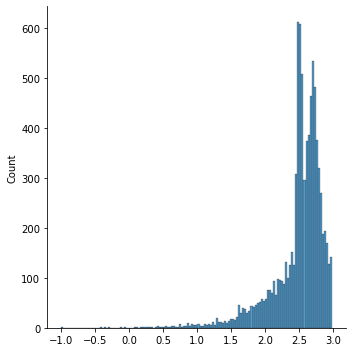

In [23]:
def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

total_claim_amount_log = list(map(log_transfom_clean1, marcusan['total claim amount']))
sns.displot(total_claim_amount_log)
plt.show()

<ipython-input-24-1918d08322cf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcusan['total_claim_amount_log'] = list(map(log_transfom_clean2, marcusan['total claim amount']))
<ipython-input-24-1918d08322cf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcusan['total_claim_amount_log'] = marcusan['total_claim_amount_log'].fillna(np.mean(marcusan['total_claim_amount_log']))


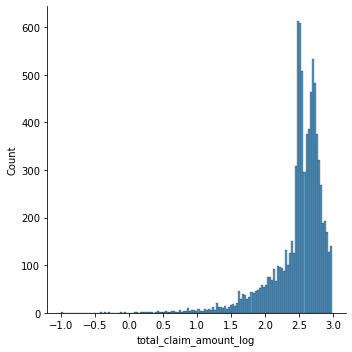

In [24]:
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 
marcusan['total_claim_amount_log'] = list(map(log_transfom_clean2, marcusan['total claim amount']))
marcusan['total_claim_amount_log'] = marcusan['total_claim_amount_log'].fillna(np.mean(marcusan['total_claim_amount_log']))
sns.displot(marcusan['total_claim_amount_log'])
plt.show()

In [25]:
marcusan.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,total_claim_amount_log
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2.585248
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2.753179
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2.724179
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2.140291
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,2.202442


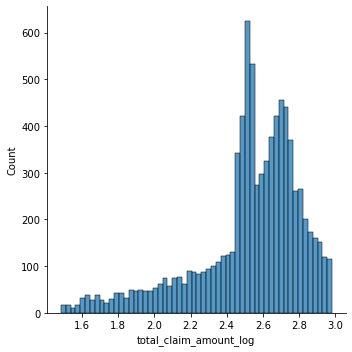

In [26]:
iqr = np.percentile(marcusan['total_claim_amount_log'],75) - np.percentile(marcusan['total_claim_amount_log'],25)
upper_limit = np.percentile(marcusan['total_claim_amount_log'],75) + 3*iqr
lower_limit = np.percentile(marcusan['total_claim_amount_log'],25) - 3*iqr
marcusan = marcusan[(marcusan['total_claim_amount_log']>lower_limit) & (marcusan['total_claim_amount_log']<upper_limit)]
sns.displot(marcusan['total_claim_amount_log'])
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Y = marcusan['total claim amount']
X = marcusan.drop(['total claim amount'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

<ipython-input-27-064861904755>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include = np.object)


In [28]:
X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total_claim_amount_log
0,2763.519279,56274,69,32,5,0,1,2.585248
2,12887.431650,48767,108,18,38,0,2,2.753179
3,7645.861827,0,106,18,65,0,7,2.724179
4,2813.692575,43836,73,12,44,0,1,2.140291
5,8256.297800,62902,69,14,94,0,2,2.202442
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,2.297180
9130,3096.511217,21604,79,14,28,0,1,2.578868
9131,8163.890428,0,85,9,37,3,2,2.898058
9132,7524.442436,21941,96,34,3,0,3,2.839604


In [29]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized, columns=X_num.columns)

(8444, 8)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total_claim_amount_log
0,0.013112,0.562847,0.034043,0.914286,0.050505,0.0,0.000,0.735127
1,0.166483,0.487763,0.200000,0.514286,0.383838,0.0,0.125,0.847147
2,0.087076,0.000000,0.191489,0.514286,0.656566,0.0,0.750,0.827802
3,0.013872,0.438443,0.051064,0.342857,0.444444,0.0,0.000,0.438314
4,0.096324,0.629140,0.034043,0.400000,0.949495,0.0,0.125,0.479772
...,...,...,...,...,...,...,...,...
8439,0.325833,0.719547,0.051064,0.514286,0.898990,0.0,0.125,0.542968
8440,0.018157,0.216081,0.076596,0.400000,0.282828,0.0,0.000,0.730871
8441,0.094924,0.000000,0.102128,0.257143,0.373737,0.6,0.125,0.943790
8442,0.085237,0.219452,0.148936,0.971429,0.030303,0.0,0.250,0.904797


In [30]:
X_cat.head()

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [47]:
import time
from datetime import datetime

today = date.today()
today

datetime.date(2021, 8, 13)

In [45]:
string = marcusan['effective to date']
string.replace('/',',')
marcusan['effective to date'].head()

0    2/24/11
2    2/19/11
3    1/20/11
4     2/3/11
5    1/25/11
Name: effective to date, dtype: object

In [66]:
marcusan['effective to date'] = pd.to_datetime(marcusan['effective to date'], errors='coerce')
marcusan.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                   int64
months since policy inception             int64
number of open complaints                 int64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [61]:
print(marcusan['effective to date'].dtype)

datetime64[ns]


In [62]:
marcusan['year'] = marcusan['effective to date'].dt.year

In [63]:
marcusan['month'] = marcusan['effective to date'].dt.month

In [64]:
marcusan['day'] = marcusan['effective to date'].dt.day
marcusan['day'].head()

0    24
2    19
3    20
4     3
5    25
Name: day, dtype: int64

In [78]:
marcusan['effective to date'].month

AttributeError: 'Series' object has no attribute 'month'

In [70]:
marcusan['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [74]:
from sklearn.preprocessing import OneHotEncoder

X_cat = X.select_dtypes(include = np.object)

<ipython-input-74-c8b86ae48eab>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = X.select_dtypes(include = np.object)


In [80]:
marcusan = marcusan.drop(['effective to date'], axis=1)
marcusan.head()

,customer,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,location code,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,total_claim_amount_log,year,month,day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2.585248,2011,2,24
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2.753179,2011,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2.724179,2011,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2.140291,2011,2,3
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,...,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,2.202442,2011,1,25


In [81]:
marcusan['customer']

0       BU79786
2       AI49188
3       WW63253
4       HB64268
5       OC83172
         ...   
9129    LA72316
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: customer, Length: 8444, dtype: object